In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Merged Data/LatestData/ProcessedData2.xlsx",na_values='--')


In [ ]:
df.shape

(926, 31)

In [ ]:
df.head()

,Scheme_name,Category,Category_Equity,Category_Debt,Category_Hybrid,Expense_ratio,Risk_factor,age_in_months,Rating,Net_assets,...,Standard Deviation,Sharpe Ratio,Sortino Ratio,NAV_latest,NAV_previous,NAV_52wk_high,NAV_52wk_low,Minimum_Investment,Fund_Manager_Tenure,#_Funds_managed
0,Aditya Birla Sun Life Bal Bhavishya Yojna - Di...,EQ-FLX,1,0,0,0.76,5,49,2,637,...,19.33,0.37,0.47,13.75,13.71,15.26,12.52,1000,2.0,4
1,Aditya Birla Sun Life Banking & Financial Serv...,EQ-BANK,1,0,0,1.17,5,111,2,2385,...,33.75,0.38,0.45,41.83,41.51,46.71,35.15,1000,7.6,3
2,Aditya Birla Sun Life Commodity Equities Fund ...,EQ-INTL,1,0,0,1.29,5,122,2,16,...,22.66,0.76,0.89,36.92,36.22,44.33,35.08,1000,0.3,4
3,Aditya Birla Sun Life Digital India Fund - Dir...,EQ-IT,1,0,0,0.88,5,122,2,3338,...,24.56,1.08,1.37,126.85,126.54,151.66,115.18,1000,9.2,2
4,Aditya Birla Sun Life Dividend Yield Fund - Di...,EQ-DIV Y,1,0,0,1.73,5,122,2,850,...,21.16,0.82,0.98,284.74,284.57,302.25,231.67,1000,1.0,3


In [ ]:
df.describe()

,Category_Equity,Category_Debt,Category_Hybrid,Expense_ratio,Risk_factor,age_in_months,Rating,Net_assets,Return_1wk,Return_1m,...,Standard Deviation,Sharpe Ratio,Sortino Ratio,NAV_latest,NAV_previous,NAV_52wk_high,NAV_52wk_low,Minimum_Investment,Fund_Manager_Tenure,#_Funds_managed
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,...,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,0.507559,0.316415,0.176026,0.696166,3.589633,102.443844,2.790497,3945.674946,0.557451,-0.665875,...,14.143585,0.727894,1.181350,360.103569,359.816448,371.288229,333.825247,3240.981641,4.811771,6.377970
std,0.500213,0.465328,0.381048,0.484236,1.776745,33.468478,1.062051,8776.033372,0.644382,1.430788,...,10.415044,0.446382,1.374444,827.613170,827.367416,834.385368,781.037547,4006.832204,3.180570,5.274693
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,1.000000,-1.650000,-9.830000,...,0.250000,-2.310000,-8.910000,6.320000,6.340000,8.370000,4.690000,10.000000,0.100000,1.000000
25%,0.000000,0.000000,0.000000,0.300000,2.000000,77.000000,2.000000,164.750000,0.150000,-1.800000,...,2.352500,0.520000,0.610000,21.489750,21.478500,22.624750,19.171250,500.000000,2.000000,3.000000
50%,1.000000,0.000000,0.000000,0.600000,5.000000,122.000000,3.000000,933.500000,0.300000,-0.430000,...,17.745000,0.690000,0.830000,46.077000,45.972500,49.165000,42.025000,5000.000000,4.200000,5.000000
75%,1.000000,1.000000,0.000000,1.010000,5.000000,122.000000,3.750000,3819.750000,0.910000,0.540000,...,22.280000,0.910000,1.257500,173.602500,173.057500,192.032500,152.037500,5000.000000,7.000000,9.000000
max,1.000000,1.000000,1.000000,2.590000,5.000000,255.000000,5.000000,143708.000000,4.630000,5.430000,...,77.710000,4.020000,16.650000,5495.305000,5494.243000,5495.305000,5203.074000,100000.000000,14.800000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scheme_name               926 non-null    object 
 1   Category                  926 non-null    object 
 2   Category_Equity           926 non-null    int64  
 3   Category_Debt             926 non-null    int64  
 4   Category_Hybrid           926 non-null    int64  
 5   Expense_ratio             926 non-null    float64
 6   Risk_factor               926 non-null    int64  
 7   age_in_months             926 non-null    int64  
 8   Rating                    926 non-null    int64  
 9   Net_assets                926 non-null    int64  
 10  Return_1wk                926 non-null    float64
 11  Return_1m                 926 non-null    float64
 12  Return_3m                 926 non-null    float64
 13  Return_6m                 926 non-null    float64
 14  Return_1yr

In [ ]:
print("Number of null values = " + str(df.isnull().sum().sum()))

Number of null values = 0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Different categorical values
print(df['Risk_factor'].unique())

[5 0 1 3 2 4]


In [ ]:
#Number of scheme categories
print("Total number of schemes are: " + str(len(df['Category'].unique())))

Total number of schemes are: 44


In [ ]:
#Number of scheme categories
print("Total number of schemes are: " + str(len(df['Scheme_name'].unique())))

Total number of schemes are: 926


In [ ]:
df_numeric = df.select_dtypes(include=['int64','float64'])
df_object = df.select_dtypes(include=['object'])

**Analyzing most significant correlations**

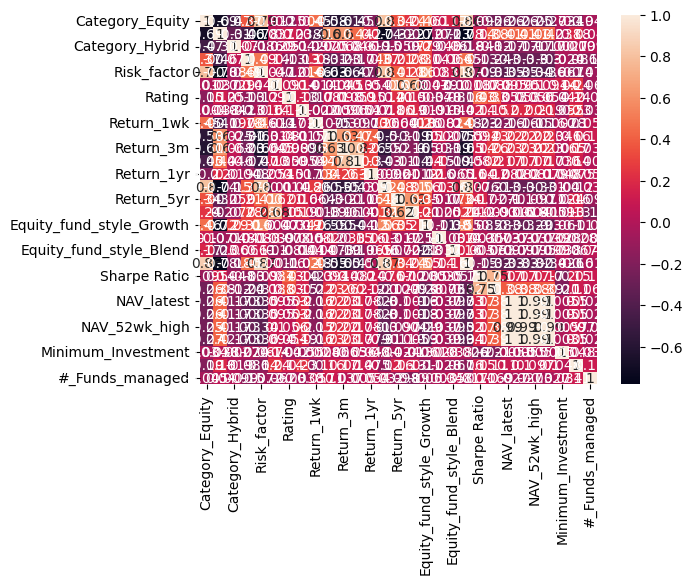

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df_numeric.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
print(corr_matrix)

                          Category_Equity  Category_Debt  Category_Hybrid  \
Category_Equity                  1.000000      -0.690714        -0.469243   
Category_Debt                   -0.690714       1.000000        -0.314459   
Category_Hybrid                 -0.469243      -0.314459         1.000000   
Expense_ratio                    0.373087      -0.459229         0.071039   
Risk_factor                      0.792941      -0.781632        -0.086404   
age_in_months                   -0.012115       0.036510        -0.028682   
Rating                          -0.153708       0.123343         0.051154   
Net_assets                      -0.004004       0.038466        -0.041718   
Return_1wk                       0.452008      -0.406162        -0.097367   
Return_1m                       -0.578756       0.601413         0.025317   
Return_3m                       -0.613924       0.603905         0.068440   
Return_6m                       -0.446634       0.442247         0.046246   

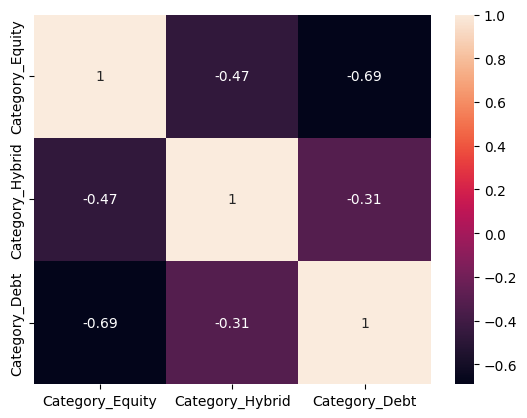

In [ ]:
corr_category_matrix = df[["Category_Equity","Category_Hybrid","Category_Debt"]].corr()
sn.heatmap(corr_category_matrix, annot=True)
plt.show()


In [ ]:
print(corr_category_matrix)

                 Category_Equity  Category_Hybrid  Category_Debt
Category_Equity         1.000000        -0.469243      -0.690714
Category_Hybrid        -0.469243         1.000000      -0.314459
Category_Debt          -0.690714        -0.314459       1.000000


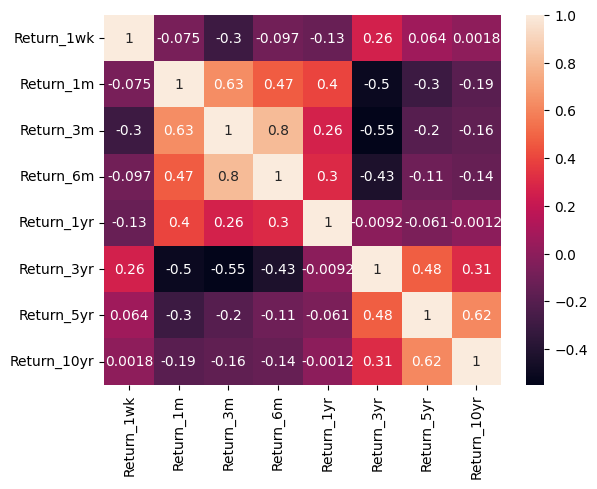

In [ ]:
corr_return_matrix = df[["Return_1wk","Return_1m","Return_3m","Return_6m","Return_1yr","Return_3yr","Return_5yr","Return_10yr"]].corr()
sn.heatmap(corr_return_matrix, annot=True)
plt.show()

In [ ]:
print(corr_return_matrix)

             Return_1wk  Return_1m  Return_3m  Return_6m  Return_1yr  \
Return_1wk     1.000000  -0.075278  -0.297371  -0.096985   -0.131743   
Return_1m     -0.075278   1.000000   0.632127   0.472638    0.396024   
Return_3m     -0.297371   0.632127   1.000000   0.802540    0.262441   
Return_6m     -0.096985   0.472638   0.802540   1.000000    0.298902   
Return_1yr    -0.131743   0.396024   0.262441   0.298902    1.000000   
Return_3yr     0.257019  -0.501443  -0.549085  -0.432821   -0.009168   
Return_5yr     0.064042  -0.303538  -0.199638  -0.109828   -0.061022   
Return_10yr    0.001750  -0.188541  -0.164414  -0.143213   -0.001241   

             Return_3yr  Return_5yr  Return_10yr  
Return_1wk     0.257019    0.064042     0.001750  
Return_1m     -0.501443   -0.303538    -0.188541  
Return_3m     -0.549085   -0.199638    -0.164414  
Return_6m     -0.432821   -0.109828    -0.143213  
Return_1yr    -0.009168   -0.061022    -0.001241  
Return_3yr     1.000000    0.477717     0.308

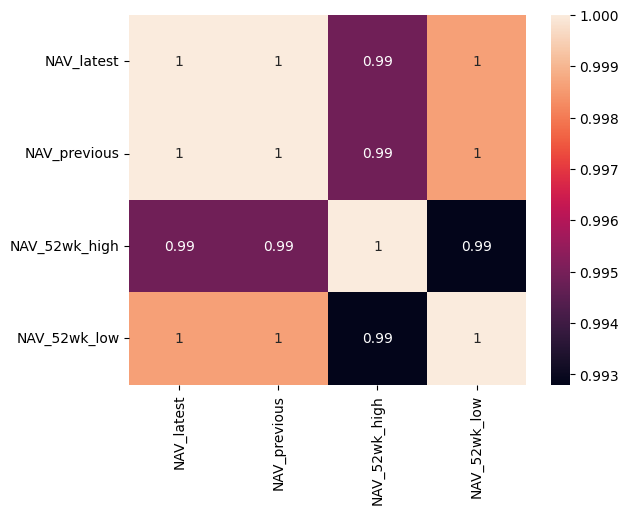

In [ ]:
corr_nav_matrix = df[["NAV_latest", "NAV_previous", "NAV_52wk_high","NAV_52wk_low"]].corr()
sn.heatmap(corr_nav_matrix, annot=True)
plt.show()

In [ ]:
print(corr_nav_matrix)

               NAV_latest  NAV_previous  NAV_52wk_high  NAV_52wk_low
NAV_latest       1.000000      1.000000       0.994879      0.998596
NAV_previous     1.000000      1.000000       0.994861      0.998615
NAV_52wk_high    0.994879      0.994861       1.000000      0.992804
NAV_52wk_low     0.998596      0.998615       0.992804      1.000000


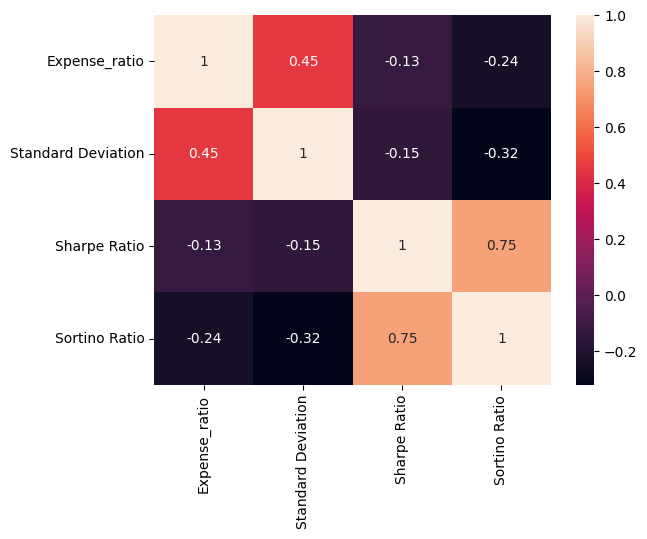

In [ ]:
corr_ratio_matrix = df[["Expense_ratio", "Standard Deviation", "Sharpe Ratio","Sortino Ratio"]].corr()
sn.heatmap(corr_ratio_matrix, annot=True)
plt.show()

In [ ]:
print(corr_ratio_matrix)

                    Expense_ratio  Standard Deviation  Sharpe Ratio  \
Expense_ratio            1.000000            0.450481     -0.130050   
Standard Deviation       0.450481            1.000000     -0.148759   
Sharpe Ratio            -0.130050           -0.148759      1.000000   
Sortino Ratio           -0.242369           -0.320556      0.748520   

                    Sortino Ratio  
Expense_ratio           -0.242369  
Standard Deviation      -0.320556  
Sharpe Ratio             0.748520  
Sortino Ratio            1.000000  


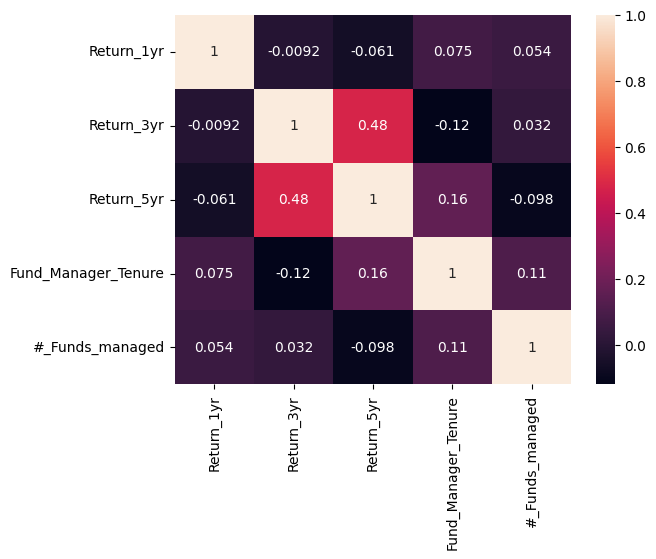

In [ ]:
corr_return_manager_matrix = df[["Return_1yr","Return_3yr", "Return_5yr", "Fund_Manager_Tenure","#_Funds_managed"]].corr()
sn.heatmap(corr_return_manager_matrix, annot=True)
plt.show()

In [ ]:
print(corr_return_manager_matrix)

                     Return_1yr  Return_3yr  Return_5yr  Fund_Manager_Tenure  \
Return_1yr             1.000000   -0.009168   -0.061022             0.074994   
Return_3yr            -0.009168    1.000000    0.477717            -0.118653   
Return_5yr            -0.061022    0.477717    1.000000             0.162800   
Fund_Manager_Tenure    0.074994   -0.118653    0.162800             1.000000   
#_Funds_managed        0.054293    0.031540   -0.098264             0.112337   

                     #_Funds_managed  
Return_1yr                  0.054293  
Return_3yr                  0.031540  
Return_5yr                 -0.098264  
Fund_Manager_Tenure         0.112337  
#_Funds_managed             1.000000  


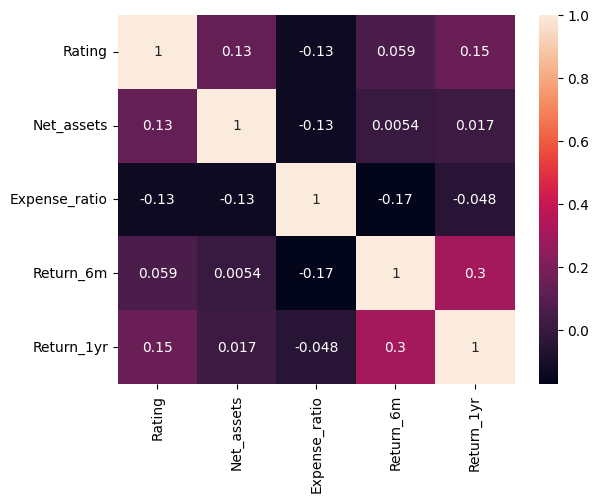

In [ ]:
corr_fundQuality_return_matrix = df[["Rating","Net_assets", "Expense_ratio", "Return_6m","Return_1yr"]].corr()
sn.heatmap(corr_fundQuality_return_matrix, annot=True)
plt.show()

In [ ]:
print(corr_fundQuality_return_matrix)

                 Rating  Net_assets  Expense_ratio  Return_6m  Return_1yr
Rating         1.000000    0.130373      -0.134123   0.058961    0.145213
Net_assets     0.130373    1.000000      -0.134622   0.005439    0.017232
Expense_ratio -0.134123   -0.134622       1.000000  -0.173128   -0.048069
Return_6m      0.058961    0.005439      -0.173128   1.000000    0.298902
Return_1yr     0.145213    0.017232      -0.048069   0.298902    1.000000


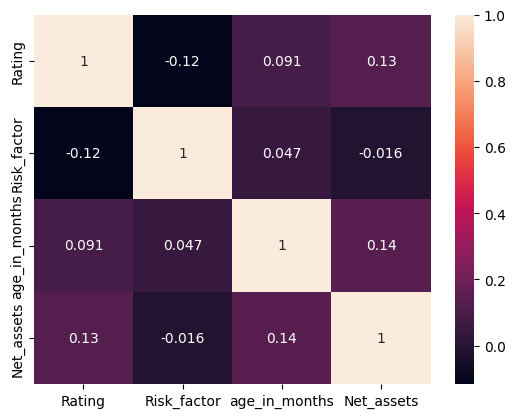

In [ ]:
corr_fundQuality_matrix = df[["Rating","Risk_factor", "age_in_months", "Net_assets"]].corr()
sn.heatmap(corr_fundQuality_matrix, annot=True)
plt.show()

In [ ]:
print(corr_fundQuality_matrix)

                 Rating  Risk_factor  age_in_months  Net_assets
Rating         1.000000    -0.116651       0.090607    0.130373
Risk_factor   -0.116651     1.000000       0.047335   -0.015708
age_in_months  0.090607     0.047335       1.000000    0.140078
Net_assets     0.130373    -0.015708       0.140078    1.000000


In [ ]:
df.columns

Index(['Scheme_name', 'Category', 'Category_Equity', 'Category_Debt',
       'Category_Hybrid', 'Expense_ratio', 'Risk_factor', 'age_in_months',
       'Rating', 'Net_assets', 'Return_1wk', 'Return_1m', 'Return_3m',
       'Return_6m', 'Return_1yr', 'Return_3yr', 'Return_5yr', 'Return_10yr',
       'Equity_fund_style_Growth', 'Equity_fund_style_Value',
       'Equity_fund_style_Blend', 'Standard Deviation', 'Sharpe Ratio',
       'Sortino Ratio', 'NAV_latest', 'NAV_previous', 'NAV_52wk_high',
       'NAV_52wk_low', 'Minimum_Investment', 'Fund_Manager_Tenure',
       '#_Funds_managed'],
      dtype='object')

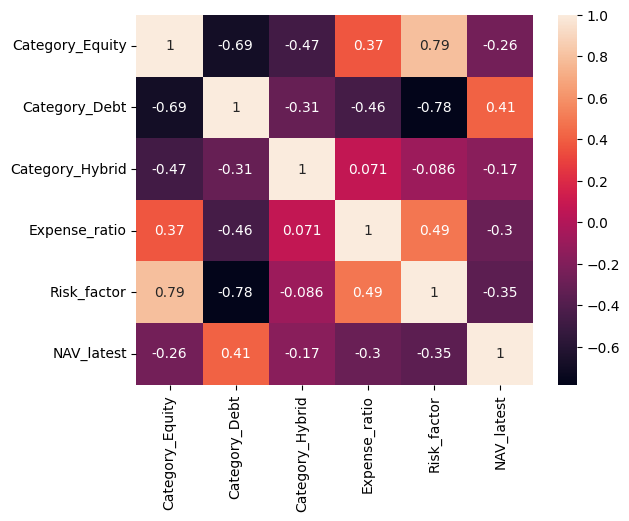

In [ ]:
corr_category_fundQuality_matrix = df[["Category_Equity","Category_Debt", "Category_Hybrid", "Expense_ratio","Risk_factor","NAV_latest"]].corr()
sn.heatmap(corr_category_fundQuality_matrix, annot=True)
plt.show()

In [ ]:
print(corr_category_fundQuality_matrix)

                 Category_Equity  Category_Debt  Category_Hybrid  \
Category_Equity         1.000000      -0.690714        -0.469243   
Category_Debt          -0.690714       1.000000        -0.314459   
Category_Hybrid        -0.469243      -0.314459         1.000000   
Expense_ratio           0.373087      -0.459229         0.071039   
Risk_factor             0.792941      -0.781632        -0.086404   
NAV_latest             -0.257616       0.414263        -0.167709   

                 Expense_ratio  Risk_factor  NAV_latest  
Category_Equity       0.373087     0.792941   -0.257616  
Category_Debt        -0.459229    -0.781632    0.414263  
Category_Hybrid       0.071039    -0.086404   -0.167709  
Expense_ratio         1.000000     0.490419   -0.298391  
Risk_factor           0.490419     1.000000   -0.350727  
NAV_latest           -0.298391    -0.350727    1.000000  


In [ ]:
def multi_box_plot(multi_plt_df,fig_size = (12,6)):
  col_size = len(multi_plt_df.columns)
  fig, axs = plt.subplots(max(2,col_size//2), 2,figsize=fig_size)
  for pos,column in enumerate(multi_plt_df.columns):
        x = min(pos//2 + pos%2 ,pos//2)
        y = max(pos%2,pos%2)
#         print(x,y)
        axs[x, y].boxplot(multi_plt_df[column].values, 0,'k', 0)
        axs[x, y].set_title(column,fontsize = 15)

  fig.subplots_adjust(left=0.08, right=0.98, bottom=0.8, top=1.8, hspace=0.8, wspace=0.5)

**Searching for outliers**

In [ ]:
fund_performance = ['Return_1wk', 'Return_3m', 'Return_6m','Return_1yr','Return_3yr','Return_5yr', 'Return_10yr', 'Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio' ]
fees_column = ['Expense_ratio']
other_numeric_features = ['age_in_months', 'Net_assets', 'NAV_latest', 'NAV_previous', 'NAV_52wk_high', 'NAV_52wk_high', 'Fund_Manager_Tenure', '#_Funds_managed']

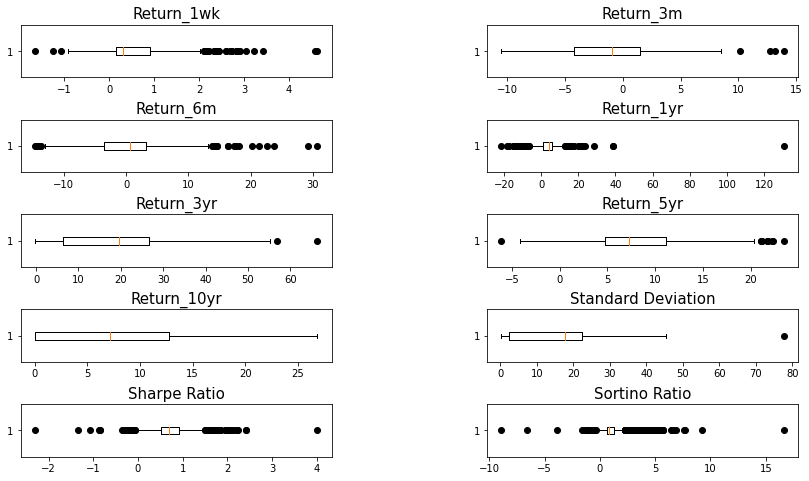

In [ ]:
# In performance features
multi_box_plot(df_numeric[fund_performance])

In [ ]:
df_numeric[fees_column].describe().T

,count,mean,std,min,25%,50%,75%,max
Expense_ratio,926.0,0.696166,0.484236,0.0,0.3,0.6,1.01,2.59
